In [1]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Import Path from pathlib
from pathlib import Path

# Import yfinance package
import yfinance as yf

# Import pandas package
import pandas as pd

# Import pretty printing
from pprint import pprint

In [2]:
# Load the data issuers data
issuers = pd.read_csv(Path.cwd().parent / 'data' / 'new_data.csv')

In [3]:
# View the issuers data -> Issuer Name and Security Id
issuers[['Issuer Name', 'Security Code']].head()

,Issuer Name,Security Code
0,NVIDIA Corporation,NVDA
1,Apple Inc.,AAPL
2,Microsoft Corporation,MSFT
3,"Amazon.com, Inc.",AMZN
4,Alphabet Inc.,GOOG


In [4]:
# Pull the data for the first security
stock_data = yf.Ticker("NVDA")

In [5]:
# Extract full of the stock
stock_data_info = stock_data.info

# Extract only the important information
stock_data_info = {
    'Basic Information': {
        'symbol': stock_data_info['symbol'],
        'longName': stock_data_info['longName'],
        'currency': stock_data_info['currency'],
        'exchange': stock_data_info['exchange']
    },
    'Market Data': {
        'currentPrice': stock_data_info['currentPrice'],
        'previousClose': stock_data_info['previousClose'],
        'open': stock_data_info['open'],
        'dayLow': stock_data_info['dayLow'],
        'dayHigh': stock_data_info['dayHigh'],
        'regularMarketPreviousClose': stock_data_info['regularMarketPreviousClose'],
        'regularMarketOpen': stock_data_info['regularMarketOpen'],
        'regularMarketDayLow': stock_data_info['regularMarketDayLow'],
        'regularMarketDayHigh': stock_data_info['regularMarketDayHigh'],
        'fiftyTwoWeekLow': stock_data_info['fiftyTwoWeekLow'],
        'fiftyTwoWeekHigh': stock_data_info['fiftyTwoWeekHigh'],
        'fiftyDayAverage': stock_data_info['fiftyDayAverage'],
        'twoHundredDayAverage': stock_data_info['twoHundredDayAverage']
    },
    'Volume and Shares': {
        'volume': stock_data_info['volume'],
        'regularMarketVolume': stock_data_info['regularMarketVolume'],
        'averageVolume': stock_data_info['averageVolume'],
        'averageVolume10days': stock_data_info['averageVolume10days'],
        'averageDailyVolume10Day': stock_data_info['averageDailyVolume10Day'],
        'sharesOutstanding': stock_data_info['sharesOutstanding'],
        'floatShares': stock_data_info['floatShares']
    },
    'Dividends and Yield': {
        'dividendRate': stock_data_info['dividendRate'],
        'dividendYield': stock_data_info['dividendYield'],
        'payoutRatio': stock_data_info['payoutRatio']
    },
    'Valuation and Ratios': {
        'marketCap': stock_data_info['marketCap'],
        'enterpriseValue': stock_data_info['enterpriseValue'],
        'priceToBook': stock_data_info['priceToBook'],
        'debtToEquity': stock_data_info['debtToEquity'],
        'grossMargins': stock_data_info['grossMargins'],
        'profitMargins': stock_data_info['profitMargins']
    },
    'Financial Performance': {
        'totalRevenue': stock_data_info['totalRevenue'],
        'revenuePerShare': stock_data_info['revenuePerShare'],
        'totalCash': stock_data_info['totalCash'],
        'totalCashPerShare': stock_data_info['totalCashPerShare'],
        'totalDebt': stock_data_info['totalDebt'],
        'earningsGrowth': stock_data_info['earningsGrowth'],
        'revenueGrowth': stock_data_info['revenueGrowth'],
        'returnOnAssets': stock_data_info['returnOnAssets'],
        'returnOnEquity': stock_data_info['returnOnEquity']
    },
    'Cash Flow': {
        'freeCashflow': stock_data_info['freeCashflow'],
        'operatingCashflow': stock_data_info['operatingCashflow']
    },
    'Analyst Targets': {
        'targetHighPrice': stock_data_info['targetHighPrice'],
        'targetLowPrice': stock_data_info['targetLowPrice'],
        'targetMeanPrice': stock_data_info['targetMeanPrice'],
        'targetMedianPrice': stock_data_info['targetMedianPrice']
    }
}

In [6]:
# View the stock info
pprint(stock_data_info)

{'Analyst Targets': {'targetHighPrice': 202.79,
                     'targetLowPrice': 75.4,
                     'targetMeanPrice': 148.87,
                     'targetMedianPrice': 150.0},
 'Basic Information': {'currency': 'USD',
                       'exchange': 'NMS',
                       'longName': 'NVIDIA Corporation',
                       'symbol': 'NVDA'},
 'Cash Flow': {'freeCashflow': 33725874176, 'operatingCashflow': 48663998464},
 'Dividends and Yield': {'dividendRate': 0.04,
                         'dividendYield': 0.00029999999,
                         'payoutRatio': 0.010299999},
 'Financial Performance': {'earningsGrowth': 1.68,
                           'returnOnAssets': 0.55258,
                           'returnOnEquity': 1.23767,
                           'revenueGrowth': 1.224,
                           'revenuePerShare': 3.91,
                           'totalCash': 34800001024,
                           'totalCashPerShare': 1.419,
                   

In [7]:
# Create dictionary for periods and intervals
periods = {
    '1d': ['1m', '2m', '5m', '15m', '30m', '60m', '90m'],
    '5d': ['1m', '2m', '5m', '15m', '30m', '60m', '90m'],
    '1mo': ['30m', '60m', '90m', '1d'],
    '3mo': ['1d', '5d', '1wk', '1mo'],
    '6mo': ['1d', '5d', '1wk', '1mo'],
    '1y': ['1d', '5d', '1wk', '1mo'],
    '2y': ['1d', '5d', '1wk', '1mo'],
    '5y': ['1d', '5d', '1wk', '1mo'],
    '10y': ['1d', '5d', '1wk', '1mo'],
    'max': ['1d', '5d', '1wk', '1mo'],
}

In [8]:
# Extract the data for last 1yr with 1d interval
stock_data_hist = stock_data.history(period="2y", interval="1d")
stock_data_hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-11-08 00:00:00-05:00,14.787478,14.877396,14.203012,14.588660,595292000,0.0,0.0
2022-11-09 00:00:00-05:00,14.149060,14.198016,13.746429,13.763413,454414000,0.0,0.0
2022-11-10 00:00:00-05:00,14.786480,15.758591,14.533711,15.735612,700819000,0.0,0.0
2022-11-11 00:00:00-05:00,15.792560,16.374028,15.467857,16.312084,655487000,0.0,0.0
2022-11-14 00:00:00-05:00,16.203182,16.524888,15.907452,16.280111,527852000,0.0,0.0
...,...,...,...,...,...,...,...
2024-11-04 00:00:00-05:00,137.210007,138.960007,135.570007,136.050003,187528200,0.0,0.0
2024-11-05 00:00:00-05:00,137.449997,140.369995,137.330002,139.910004,160537400,0.0,0.0
2024-11-06 00:00:00-05:00,142.960007,146.490005,141.960007,145.610001,242043900,0.0,0.0


In [9]:
# Clean the data for to keep only the required columns
stock_data_hist = stock_data_hist[['Close']]

In [10]:
# Imports
import datetime as dt

#Statsmodels is a great library we can use to run regressions
import statsmodels.api as sm

# Import matplotlib for plotting
import matplotlib.pyplot as plt

# Seaborn extends the capabilities of Matplotlib
import seaborn as sns
sns.set_style("darkgrid")

In [11]:
# Change frequency to day
stock_data_hist = stock_data_hist.asfreq('D', method='ffill')

In [12]:
# Fill missing values
stock_data_hist = stock_data_hist.fillna(method='ffill')

In [13]:
# View the new data
stock_data_hist

,Close
Date,
2022-11-08 00:00:00-05:00,14.588660
2022-11-09 00:00:00-05:00,13.763413
2022-11-10 00:00:00-05:00,15.735612
2022-11-11 00:00:00-05:00,16.312084
2022-11-12 00:00:00-05:00,16.312084
...,...
2024-11-04 00:00:00-05:00,136.050003
2024-11-05 00:00:00-05:00,139.910004
2024-11-06 00:00:00-05:00,145.610001


In [14]:
# Import the required libraries
from statsmodels.tsa.ar_model import AutoReg

# Define training and testing area
train_df = stock_data_hist.iloc[:int(len(stock_data_hist) * 0.9) + 1] # 90%
test_df = stock_data_hist.iloc[int(len(stock_data_hist) * 0.9):] # 10%

In [15]:
# Define training model
model = AutoReg(train_df['Close'], 250).fit(cov_type="HC0")

In [16]:
# Predict data for test data
predictions = model.predict(start=test_df.index[0], end=test_df.index[-1], dynamic=True)

# Predict 90 days into the future
forecast = model.predict(start=test_df.index[0], end=test_df.index[-1]+dt.timedelta(days=90), dynamic=True)

# View the forecasted values
forecast

2024-08-27 00:00:00-04:00    128.074345
2024-08-28 00:00:00-04:00    126.459556
2024-08-29 00:00:00-04:00    125.966625
2024-08-30 00:00:00-04:00    128.400087
2024-08-31 00:00:00-04:00    129.173588
                                ...    
2025-02-02 00:00:00-05:00    344.139913
2025-02-03 00:00:00-05:00    282.106955
2025-02-04 00:00:00-05:00    312.695770
2025-02-05 00:00:00-05:00    296.052700
2025-02-06 00:00:00-05:00    315.260860
Freq: D, Length: 164, dtype: float64

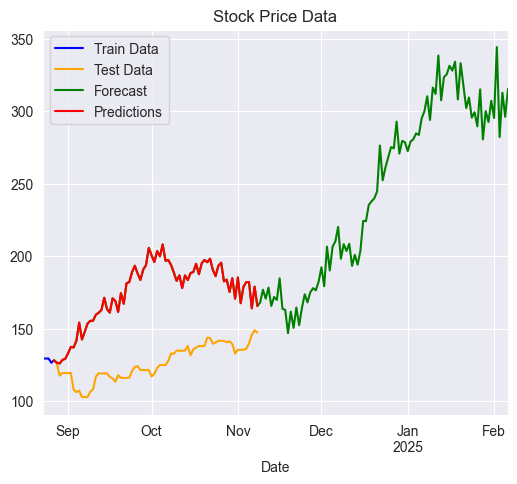

In [17]:
# Set style for seaborn plot
sns.set_style('darkgrid')

# Add automatic datetime converters
pd.plotting.register_matplotlib_converters()

# Default figure size
sns.mpl.rc('figure',figsize=(6, 5))

# Set fig and ax
fig, ax = plt.subplots()

# Plot the data
ax = train_df.tail(5).plot(ax=ax, color='blue')
ax = test_df.plot(ax=ax, color='orange')
ax = forecast.plot(ax=ax, color='green')
ax = predictions.plot(ax=ax, color='red')

# Customize the plot
plt.legend(["Train Data", "Test Data", "Forecast", "Predictions"])
plt.title("Stock Price Data")

# Show the plot
plt.show()